In [43]:
import networkx as nx
import random
from nxsim import BaseNetworkAgent, BaseLoggingAgent, NetworkSimulation


In [44]:
#forgiveness
Pfor = 0.3

In [45]:
number_of_nodes = 1000
#m : Number of edges to attach from a new node to existing nodes
number_of_edges = 2
G = nx.barabasi_albert_graph(n = number_of_nodes, m = number_of_edges)


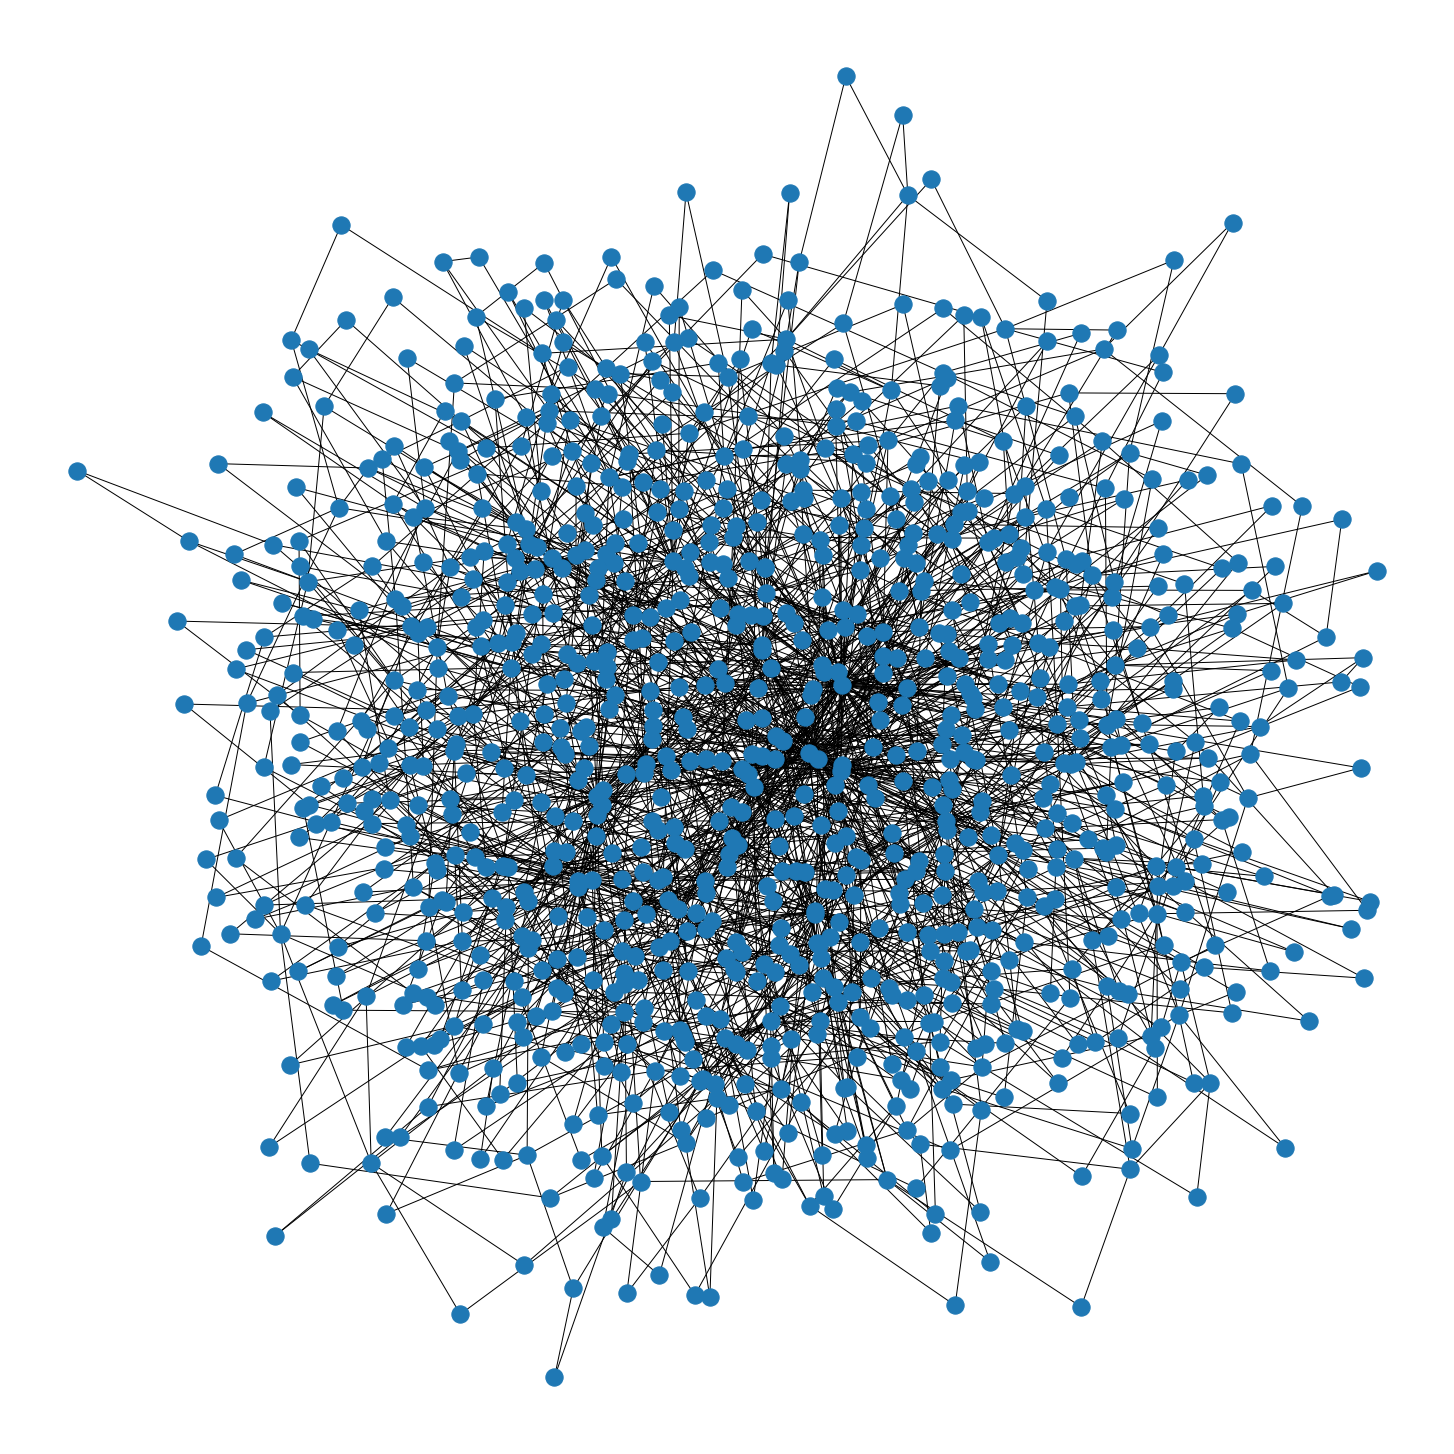

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,20))
nx.draw(G)


In [227]:
def play_pd(player, opponent):     
    if (player == 0) and (opponent == 0):
        return 1, 1
    
    elif (player == 0) and (opponent == 1):
        return 5, 0
    
    elif (player == 1) and (opponent == 1):
        return 3, 3
    
    elif (player == 1) and (opponent == 0):
        return 0, 5
        

In [293]:
def decide(player, opponent):
    #UC
    if player.state['id'] == 1:
        return 1
    #UD
    elif player.state['id'] == 2:
        return 0
    #TFT
    elif player.state['id'] == 3:
        # First move
        if not player.history:
            return 1
        # React to the opponent's last move
        elif id(player) in opponent.history:
            if opponent.history[id(player)] == 1:
                return 1
            else:
                return 0
        #####Code check: if player has history with other opponents but not this opponent, return 1
        else:
            return 1
    #CR
    elif player.state['id'] == 4:
        #####Code change: if first move
        if not player.history:
            return 1
        else:
            return decide_cr(player, opponent)
    #UR
    elif player.state['id'] == 5:
        #####Code change: if first move
        if not player.history:
            return 1
        else:
            return decide_ur(player, opponent)
    #SJ
    elif player.state['id'] == 6:
        #####Code change: if first move
        if not player.history:
            return 1
        else:
            return decide_sj(player, opponent)
    #Print error if not found
    else:
        print('error: undefined strategy type')
        

In [300]:
#A function for CR

def decide_cr(player, opponent):
    #Find common neighbors(agent)
    
    #print(type(player), type(opponent))
    A = player.get_neighboring_agents()
    B = opponent.get_neighboring_agents()
    #A list of common friends
    common_neighbors = [element for element in A if element in B]
    #print(common_neighbors)
    #print(type(common_neighbors[0]))
    #Element type: Player
    
    #If there is no common friends, play randomly
    print('cr: lengh of common neighbors:', len(common_neighbors))
    if len(common_neighbors) == 0:
        if random.random() > 0.5:
            return 1
        else:
            return 0
    else:
        #randomly select a common friend
        select_rand_friend = random.choice(common_neighbors)
        #print(select.state['id'])
        #Recall last behaviour to thie neighbor
        #If the Other played C against select_rand_friend in the previous step --> cooperate
        if id(select_rand_friend) in opponent.history:
            last_move = opponent.history[id(select_rand_friend)]
            if last_move == 1:
                return 1
            #If the Other played D against select_rand_friend in the previous step --> defect
            elif last_move == 0:
                #Forgiveness
                #If there is another common friend
                #Find his opinions
                common_neighbors.remove(select_rand_friend)
                if len(common_neighbors) > 0 and (random.random() < Pfor):
                    #Eliminate the guy already choosen from the list of friends
                    #print('common friends:', common_neighbors)
                    #Randomly select anthter friend
                    select_rand_friend_2 = random.choice(common_neighbors)
                    if id(select_rand_friend_2) in opponent.history:
                        last_move_2 = opponent.history[id(select_rand_friend_2)]
                        if last_move_2 == 1:
                            return 1
                        elif last_move_2 == 0:
                            return 0
                    else:
                        if random.random() > 0.5:
                            return 1
                        else:
                            return 0
                else:
                    if random.random() > 0.5:
                        return 1
                    else: 
                        return 0     
        #If the Other player did not play against select_rand_friend in the previous step --> play randomly
        else:
            if random.random() > 0.5:
                return 0
            else:
                return 1
        

In [301]:
def decide_ur(player, opponent):
    #Find a list of neighbors of the opponent
    B = opponent.get_neighboring_agents()
    #Eliminate oneself from it
    B.remove(player)
    #If the Other player did not play against select_rand_friend in the previous step --> play randomly
    if len(B) == 0:
        if random.random() > 0.5:
            return 1
        else:
            return 0
    else:
        #Select a random friend
        select_rand_friend = random.choice(B)
        if id(select_rand_friend) in opponent.history:
            last_move = opponent.history[id(select_rand_friend)]
            if last_move == 1:
                return 1
            else:
                #Give opponent another chance based on another friend
                B.remove(select_rand_friend)
                if len(B) == 0:
                    if random.random() > 0.5:
                        return 1
                    else:
                        return 0
                else:
                    select_rand_friend_2 = random.choice(B)
                    if id(select_rand_friend_2) in opponent.history:
                        last_move_2 = opponent.history[id(select_rand_friend_2)]
                        if last_move_2 == 1:
                            return 1
                        elif last_move_2 == 0:
                            return 0
                    else:
                        #If the Other player did not play against select_rand_friend in the previous step --> play randomly
                        if random.random() > 0.5:
                            return 1
                        else:
                            return 0
        else:
            if random.random() > 0.5:
                return 1
            else:
                return 0
    
    

In [302]:
def decide_sj(player, opponent):
    #Find a list of common friends
    A = player.get_neighboring_agents()
    B = opponent.get_neighboring_agents()
    common_neighbors = [element for element in A if element in B]
    #Play randomly if there is no common friends
    if len(common_neighbors) == 0:
        if random.random() > 0.5:
            return 1
        else:
            return 0
    else:
        #Randomly select a common friend
        select_rand_friend = random.choice(common_neighbors)
        if id(select_rand_friend) in opponent.history:
            #Action of Other with common friend
            last_move = opponent.history[id(select_rand_friend)]
            #Action of common friend with me
            if id(player) in select_rand_friend.history:
                last_move_2 = select_rand_friend.history[id(player)]
                #If the opponent cooperate with the common friend
                if last_move == 1: 
                    #If the common friend cooperates with the palyer
                    if last_move_2 == 1:
                        return 1
                    elif last_move_2 == 0:
                        return 0     
                elif last_move == 0:
                    if last_move_2 == 1:
                        return 0
                    elif last_move_2 == 0:
                        return 1
            #####Code change: if there is no interaction between common friend and me
            else:
                if random.random() > 0.5:
                    return 1
                else:
                    return 0
        else:
            if random.random() > 0.5:
                return 1
            else:
                return 0
        

In [303]:
#the strategy is randomly selected
#agent: same as 'process' in SimPy but behaviours are limited
#by its network
class Player(BaseNetworkAgent):
    def __init__(self, environment=None, agent_id=1, state=()):
        super().__init__(environment=environment, agent_id=agent_id, state=state)
        #using agent_id to present strategy
        #1: UC
        #2: UD
        #3: TFT
        #4: CR
        #5: UR
        #6: SJ
        self.score = 0
        self.history = {}
        #cooperate:1, defect:0
        self.behavior = decide(self, None)
    
    def update_score(self, payoff):
        self.score += payoff
    
    #decide to cooperate or defect by its strategy
    def update_behavior(self, neighbor):
        #pass
        self.behavior = decide(self, neighbor)
    
    #A dictionary recording last behaviour to a certain neifhbor
    def update_history(self, neighbor):
        #pass
        self.history[id(neighbor)] = self.behavior
        #print(self.history)
        
    #need to be developed
    def update_strategy():
        pass
    
    def game(self):
        my_neighbors = self.get_neighboring_agents()
        for neighbor in my_neighbors:
            #print(neighbor.state['id'])
            if neighbor is None:
                print('error: neighbor is None')
            else:
                print(self.state['id'], neighbor.state['id'])
                print(self.history, neighbor.history)
                print(self.behavior, neighbor.behavior)
                
                #now .behavior is behaviour at t-1
                #new_behavior is behaviour at t
                my_new_behavior = self.update_behavior(neighbor)
                neighbor_new_behavior = neighbor.update_behavior(self)
    
                #payoff at time t
                my_payoff, neighbor_payoff = play_pd(self.behavior, neighbor.behavior)
                
                #update total score
                self.update_score(my_payoff)
                neighbor.update_score(neighbor_payoff)
                
                #update history in ordert to make decision fo t+1
                self.update_history(neighbor)
                neighbor.update_history(self)
                
    
    def run(self):
        while True:
            self.game()
            yield self.env.event()

                

In [304]:
init_states = [{'id': random.randint(1, 6), } for _ in range(number_of_nodes)]

#Start games
sim = NetworkSimulation(topology = G, states = init_states, agent_type = Player,
                        max_time = 30, dir_path = 'sim_01', num_trials = 1, logging_interval = 1.0)


In [305]:
sim.run_simulation()


Starting simulations...
---Trial 0---
Setting up agents...
5 6
{} {}
1 1
5 2
{4764220664: 1} {}
1 0
5 6
{4764220664: 1, 4764217416: 1} {}
1 1
5 6
{4764220664: 1, 4764217416: 1, 4764220384: 1} {}
1 1
5 5
{4764220664: 1, 4764217416: 1, 4764220384: 1, 4764218144: 0} {}
0 1
5 3
{4764220664: 1, 4764217416: 1, 4764220384: 1, 4764218144: 0, 4779201592: 0} {}
0 1
5 5
{4764220664: 1, 4764217416: 1, 4764220384: 1, 4764218144: 0, 4779201592: 0, 4515274144: 1} {}
1 1
5 4
{4764220664: 1, 4764217416: 1, 4764220384: 1, 4764218144: 0, 4779201592: 0, 4515274144: 1, 4515272912: 1} {}
1 1
5 2
{4764220664: 1, 4764217416: 1, 4764220384: 1, 4764218144: 0, 4779201592: 0, 4515274144: 1, 4515272912: 1, 4776304088: 0} {}
0 0
5 4
{4764220664: 1, 4764217416: 1, 4764220384: 1, 4764218144: 0, 4779201592: 0, 4515274144: 1, 4515272912: 1, 4776304088: 0, 4776300784: 1} {}
1 1
5 3
{4764220664: 1, 4764217416: 1, 4764220384: 1, 4764218144: 0, 4779201592: 0, 4515274144: 1, 4515272912: 1, 4776304088: 0, 4776300784: 1, 4776

cr: lengh of common neighbors: 0
5 2
{4764219992: 1, 4764217416: 0, 4763562504: 1} {}
1 0
5 1
{4764219992: 1, 4764217416: 0, 4763562504: 1, 4729212096: 1} {}
1 1
6 6
{4764220664: 1, 4764217920: 0} {4764219264: 1, 4764219992: 1, 4764219320: 0, 4764217920: 1, 4764217584: 0, 4764219600: 0, 4764221224: 0, 4764219208: 1, 4779200584: 0, 4779201200: 0, 4779766448: 1, 4779767232: 1, 4779767456: 1, 4779769304: 0, 4515272968: 1, 4763303048: 0, 4763565416: 1, 4763564240: 1, 4763564632: 0, 4756042864: 1, 4756045552: 0, 4761279120: 1, 4761278168: 1, 4766476104: 0, 4496321448: 1, 4768729688: 0, 4777854176: 0, 4777853560: 1, 4781110048: 0, 4781111112: 1, 4729003704: 0, 4729211368: 1, 4764511256: 0, 4728094112: 0, 4762734664: 0, 4776358464: 1, 4777673504: 1, 4768920688: 0, 4768920464: 0, 4729053816: 0, 4759754568: 1, 4496364264: 0, 4768528088: 0, 4768528480: 1, 4754276080: 1, 4754272384: 1, 4757691528: 1, 4757690744: 1}
0 1
6 1
{4764220664: 0, 4764217920: 0} {4764219992: 1, 4764220664: 1, 4764217584: 

6 3
{4764219992: 0, 4764219320: 1, 4779769304: 1, 4763301536: 1, 4757776200: 1, 4757777656: 0, 4761279568: 0} {}
0 1
6 5
{4764219992: 0, 4764219320: 1, 4779769304: 1, 4763301536: 1, 4757776200: 1, 4757777656: 0, 4761279568: 0, 4770392944: 1} {}
1 1
6 4
{4764219992: 0, 4764219320: 1, 4779769304: 1, 4763301536: 1, 4757776200: 1, 4757777656: 0, 4761279568: 0, 4770392944: 1, 4781112568: 0} {}
0 1
6 6
{4764219992: 0, 4764219320: 1, 4779769304: 1, 4763301536: 1, 4757776200: 1, 4757777656: 0, 4761279568: 0, 4770392944: 1, 4781112568: 0, 4763015824: 0} {}
0 1
6 5
{4764219992: 0, 4764219320: 1, 4779769304: 1, 4763301536: 1, 4757776200: 1, 4757777656: 0, 4761279568: 0, 4770392944: 1, 4781112568: 0, 4763015824: 0, 4759830824: 0} {}
0 1
6 5
{4764219992: 0, 4764219320: 1, 4779769304: 1, 4763301536: 1, 4757776200: 1, 4757777656: 0, 4761279568: 0, 4770392944: 1, 4781112568: 0, 4763015824: 0, 4759830824: 0, 4675623512: 1} {}
1 1
6 6
{4764219992: 0, 4764219320: 1, 4779769304: 1, 4763301536: 1, 47577762

6 3
{4779768632: 1, 4779767456: 1} {4764220664: 1, 4779765832: 1, 4779768296: 1, 4761279568: 1, 4777339480: 1, 4776731480: 1, 4781112120: 1, 4777674400: 1, 4777782856: 1, 4777858664: 1, 4675622728: 1, 4757628576: 1, 4768527080: 1, 4754275296: 1, 4754275128: 1}
1 1
6 2
{4779768632: 1, 4779767456: 1} {4764218088: 0}
1 0
6 5
{4779768632: 1, 4779767456: 1, 4776732656: 0} {4779200920: 1}
0 1
6 6
{4779768632: 1, 4779767456: 1, 4776732656: 0, 4781111056: 0} {4779766392: 1}
0 1
6 5
{4779768632: 1, 4779767456: 1, 4776732656: 0, 4781111056: 0, 4756154520: 1} {4779201144: 1}
1 1
6 4
{4779768632: 1, 4779767456: 1, 4776732656: 0, 4781111056: 0, 4756154520: 1, 4764503456: 1} {}
1 1
6 3
{4779768632: 1, 4779767456: 1, 4776732656: 0, 4781111056: 0, 4756154520: 1, 4764503456: 1, 4771177248: 0} {}
0 1
6 6
{4779768632: 1, 4779767456: 1, 4776732656: 0, 4781111056: 0, 4756154520: 1, 4764503456: 1, 4771177248: 0, 4496364320: 0} {}
0 1
3 6
{4764220664: 1, 4779203720: 1} {4764219264: 1, 4764219992: 1, 47642193

cr: lengh of common neighbors: 0
4 1
{4764217416: 1, 4776300784: 0, 4777854232: 0} {4779200920: 1}
0 1
cr: lengh of common neighbors: 0
4 6
{4764217416: 1, 4776300784: 0, 4777854232: 0, 4781112008: 1} {}
1 1
cr: lengh of common neighbors: 0
4 3
{4764217416: 1, 4776300784: 0, 4777854232: 0, 4781112008: 1, 4761151304: 0} {}
0 1
cr: lengh of common neighbors: 0
6 6
{4764217584: 1, 4779203776: 1} {4764220664: 0, 4764217920: 1, 4764218088: 1, 4764219208: 1, 4779202992: 0, 4779202544: 0, 4779768240: 0, 4779767736: 0, 4779765832: 0, 4515272576: 1, 4776304368: 1, 4776304536: 1, 4757778048: 1, 4757777320: 0, 4757776760: 0, 4756043760: 1, 4756045496: 1, 4756043088: 1, 4766475880: 0, 4766477112: 1, 4766474704: 0, 4770390536: 0, 4779247992: 0, 4779245752: 0, 4779406840: 0, 4777339592: 1, 4496321448: 1, 4496321000: 0, 4776733552: 1, 4777855128: 1, 4729001856: 0, 4729210864: 1, 4761149904: 0, 4763798440: 0, 4756871712: 0, 4756872608: 0, 4728092992: 1, 4728093216: 0, 4764439664: 0, 4767168552: 0, 476

0 1
3 5
{4764219264: 1, 4761278448: 1} {4764220664: 0, 4764217416: 0, 4764220384: 0, 4764218144: 1, 4779201592: 0, 4515274144: 1, 4515272912: 1, 4776304088: 1, 4776300784: 0, 4776304536: 1, 4776302856: 1, 4763564744: 0, 4763563848: 1, 4763563960: 1, 4761278952: 0, 4766475208: 1, 4766476552: 1, 4766477280: 0, 4779246984: 0, 4779247824: 1, 4779248552: 1, 4776732264: 0, 4777853280: 1, 4777854176: 1, 4777854400: 0, 4781111392: 0, 4729211816: 1, 4761150520: 1, 4728141528: 0, 4761210384: 0, 4764441288: 0, 4762737912: 0, 4764610856: 0, 4767170288: 0, 4767168440: 1, 4763015880: 0, 4769251792: 0, 4675528464: 0, 4777780840: 0, 4777679504: 1, 4768923600: 0, 4757591656: 0, 4759756304: 0, 4759754680: 1, 4762887616: 1, 4757630592: 0, 4502915280: 0, 4757690464: 1, 4754413384: 1}
1 0
3 6
{4764219264: 1, 4761278448: 1} {4764217416: 0, 4515271232: 1, 4766475208: 1, 4496320328: 0, 4768528928: 1}
1 1
3 5
{4764219264: 1, 4761278448: 1} {4764217416: 1}
1 1
3 1
{4764219264: 1, 4761278448: 1, 4776732544: 1} {

5 4
{4779203440: 1, 4779204168: 1} {4764217416: 1, 4764218088: 1, 4779201424: 0, 4776302856: 1, 4763302320: 1, 4766475544: 0, 4779248160: 1, 4777339648: 1, 4729209464: 1, 4728143600: 1, 4777675184: 1, 4777674008: 1, 4675527792: 1, 4759756304: 0, 4766865168: 0, 4754273784: 0, 4757690520: 1}
1 1
cr: lengh of common neighbors: 0
5 5
{4779203440: 1, 4779204168: 1} {4764219992: 1, 4779202768: 1, 4756043648: 1, 4770393616: 1, 4779245752: 0, 4777339648: 1, 4767168440: 1, 4502914944: 0, 4766866232: 0, 4768526632: 1, 4754274512: 1}
1 0
5 6
{4779203440: 1, 4779204168: 1} {4764219992: 1}
1 1
5 6
{4779203440: 1, 4779204168: 1, 4762738584: 1} {}
1 1
5 2
{4779203440: 1, 4779204168: 1, 4762738584: 1, 4767169728: 1} {}
1 0
3 6
{4764219320: 1, 4756045552: 1} {4764220664: 1, 4764217416: 0, 4764219600: 1, 4779203776: 1, 4779202992: 0, 4779203720: 0, 4779202768: 0, 4779201200: 1, 4779767736: 1, 4515274144: 0, 4515270728: 0, 4776300784: 0, 4776300672: 1, 4776303360: 1, 4763562504: 0, 4763565864: 1, 4761277

cr: lengh of common neighbors: 0
1 3
{4779200920: 1, 4757775920: 1} {4779766392: 1}
1 1
1 2
{4779200920: 1, 4757775920: 1, 4777781008: 1} {}
1 0
4 3
{4779767232: 1, 4779767456: 0} {4764220664: 1, 4779203776: 0, 4779767624: 0, 4515271232: 1, 4757777600: 1, 4763565192: 1, 4756042864: 1, 4756042752: 1, 4756045552: 0, 4761279176: 1, 4770393448: 1, 4496321952: 0, 4781112120: 1, 4729002360: 1, 4776298872: 1, 4763796536: 1, 4764612200: 1, 4777859000: 1, 4768922704: 1, 4759831552: 1, 4757593504: 1, 4757592552: 1, 4675623680: 1, 4496365720: 1, 4759722976: 1, 4759908984: 1}
0 0
cr: lengh of common neighbors: 0
4 3
{4779767232: 0, 4779767456: 0} {4764220664: 1, 4779765832: 1, 4779768296: 1, 4761279568: 1, 4777339480: 1, 4776731480: 0, 4781112120: 1, 4777674400: 1, 4777782856: 1, 4777858664: 1, 4675622728: 1, 4757628576: 1, 4768527080: 1, 4754275296: 1, 4754275128: 1}
0 0
cr: lengh of common neighbors: 0
4 1
{4779767232: 0, 4779767456: 0} {4761278952: 1}
0 1
cr: lengh of common neighbors: 0
4 6
{4

4 4
{4729000456: 1, 4763797712: 0} {4764219320: 0, 4779201592: 1, 4776298872: 1, 4764511088: 1, 4756872664: 0, 4756872272: 0, 4776360312: 0, 4764485168: 0, 4768528312: 0}
0 1
cr: lengh of common neighbors: 0
cr: lengh of common neighbors: 0
4 4
{4729000456: 0, 4763797712: 0} {4779202768: 1, 4779201200: 1, 4764511088: 1, 4777680232: 1}
0 1
cr: lengh of common neighbors: 0
cr: lengh of common neighbors: 0
3 1
{4776733552: 1, 4756152728: 1} {4764217584: 1, 4779200584: 1, 4777854680: 1, 4764512208: 1, 4764612200: 1, 4757627512: 1, 4759909040: 1}
1 1
3 4
{4776733552: 1, 4756152728: 1} {4763563008: 0, 4770390760: 0, 4764512208: 0}
1 0
cr: lengh of common neighbors: 0
3 5
{4776733552: 1, 4756152728: 0} {4779247824: 1}
0 1
3 6
{4776733552: 1, 4756152728: 0, 4777678160: 1} {}
1 1
3 2
{4776733552: 1, 4756152728: 0, 4777678160: 1, 4759909768: 1} {4756042248: 0}
1 0
1 6
{4764217584: 1, 4777338360: 1} {4764220664: 0, 4764217920: 1, 4764218088: 1, 4764219208: 1, 4779202992: 0, 4779202544: 0, 4779768

1 3
{4779767232: 1, 4776733552: 1} {4764220664: 1, 4779203776: 0, 4779767624: 0, 4515271232: 1, 4757777600: 1, 4763565192: 1, 4756042864: 1, 4756042752: 1, 4756045552: 0, 4761279176: 1, 4770393448: 1, 4496321952: 0, 4781112120: 1, 4729002360: 1, 4776298872: 0, 4763796536: 1, 4764612200: 1, 4777859000: 1, 4768922704: 1, 4759831552: 1, 4757593504: 1, 4757592552: 1, 4675623680: 1, 4496365720: 1, 4759722976: 1, 4759908984: 1}
1 1
1 1
{4779767232: 1, 4776733552: 1} {4764217584: 1, 4779200584: 1, 4777854680: 1, 4764512208: 1, 4764612200: 1, 4757627512: 1, 4759909040: 1}
1 1
1 5
{4779767232: 1, 4776733552: 1} {4779203440: 1}
1 1
1 6
{4779767232: 1, 4776733552: 1, 4675527792: 1} {4515271904: 1}
1 1
1 5
{4779767232: 1, 4776733552: 1, 4675527792: 1, 4767263992: 1} {4764219992: 1}
1 1
1 3
{4779767232: 1, 4776733552: 1, 4675527792: 1, 4767263992: 1, 4777680512: 1} {4779204168: 1}
1 1
1 5
{4779767232: 1, 4776733552: 1, 4675527792: 1, 4767263992: 1, 4777680512: 1, 4502914944: 1} {4515274032: 1}
1 1


0 1
cr: lengh of common neighbors: 0
cr: lengh of common neighbors: 0
4 4
{4767168552: 0, 4769251792: 1} {4496320720: 1}
1 1
cr: lengh of common neighbors: 0
cr: lengh of common neighbors: 0
4 3
{4767168552: 0, 4769251792: 1, 4759833568: 0} {}
0 1
cr: lengh of common neighbors: 0
4 6
{4764218144: 1, 4763566032: 0} {4764219264: 0, 4764221224: 1, 4779201144: 1, 4779766056: 1, 4776304424: 0, 4756043760: 0, 4756043648: 0, 4761279120: 0, 4763796536: 0, 4675526784: 0, 4675621328: 0, 4757627512: 0, 4766866008: 1}
0 0
cr: lengh of common neighbors: 0
4 5
{4764218144: 1, 4763566032: 0} {4764221224: 1, 4779202544: 1, 4779246592: 1, 4761150128: 0, 4763798216: 0, 4728093664: 1, 4763203680: 1, 4762737688: 1, 4675526784: 0, 4777783024: 0, 4768923264: 1, 4496366448: 1, 4762888624: 0, 4762887560: 0}
1 1
cr: lengh of common neighbors: 0
4 5
{4764218144: 1, 4763566032: 1} {4779767456: 1}
1 1
cr: lengh of common neighbors: 0
2 6
{4515274032: 0, 4777854176: 0} {4764218088: 1, 4779769304: 1, 4776300616: 1,

1 5
{4776300784: 1, 4761209208: 1} {4777856360: 1}
1 1
3 6
{4777339760: 1, 4777673392: 1} {4763564800: 0, 4756042752: 0, 4728142760: 1, 4767168776: 1, 4757591600: 1}
1 1
3 2
{4777339760: 1, 4777673392: 1} {4779201144: 0, 4766474648: 0, 4757591600: 0, 4757630592: 0, 4759722136: 0}
1 0
3 3
{4777339760: 1, 4777673392: 0} {4776300272: 1}
0 1
3 6
{4777339760: 1, 4777673392: 0, 4768526744: 1} {4761279624: 1}
1 1
1 4
{4776731480: 1, 4729054992: 1} {4779203776: 1, 4779767456: 0, 4764487632: 0, 4767167320: 0, 4757592440: 0, 4502913656: 0, 4756936016: 1, 4759911784: 1}
1 0
cr: lengh of common neighbors: 0
1 2
{4776731480: 1, 4729054992: 1} {4756042752: 0, 4763798384: 0, 4757592440: 0}
1 0
1 3
{4776731480: 1, 4729054992: 1} {4779766056: 1}
1 1
2 2
{4764217416: 0, 4779767232: 0} {4764219264: 0, 4764219992: 0, 4764219320: 0, 4764217864: 0, 4764220384: 0, 4764221224: 0, 4779200920: 0, 4779203776: 0, 4779200584: 0, 4779201704: 0, 4779202544: 0, 4779201144: 0, 4779203440: 0, 4779766056: 0, 4779769584:

1 0
cr: lengh of common neighbors: 0
5 6
{4776361656: 0, 4757627176: 1} {4675529248: 0, 4759754120: 1, 4502914104: 0}
0 0
1 6
{4779201424: 1, 4766475544: 1} {4764221224: 0, 4779203440: 0, 4779769024: 1, 4757777040: 1, 4770393392: 1, 4777337912: 0, 4781111224: 0, 4761152032: 0, 4728094672: 1, 4768213984: 0, 4777782688: 1, 4777858552: 1, 4771177696: 0, 4759756360: 1, 4675622896: 1, 4496366448: 1, 4762887392: 0, 4502916624: 1, 4759723088: 0}
1 0
1 1
{4779201424: 1, 4766475544: 1} {4779203440: 1, 4761279624: 1, 4502916624: 1, 4759722304: 1}
1 1
2 2
{4764217416: 0, 4763300192: 0} {4764219264: 0, 4764219992: 0, 4764219320: 0, 4764217864: 0, 4764220384: 0, 4764221224: 0, 4779200920: 0, 4779203776: 0, 4779200584: 0, 4779201704: 0, 4779202544: 0, 4779201144: 0, 4779203440: 0, 4779766056: 0, 4779769584: 0, 4779769024: 0, 4779769528: 0, 4779767624: 0, 4779766392: 0, 4515272968: 0, 4515271904: 0, 4776304368: 0, 4763302600: 0, 4763301872: 0, 4763300192: 0, 4757775920: 0, 4757776816: 0, 4761278448: 

cr: lengh of common neighbors: 0
3 3
{4756043088: 1, 4777857432: 1} {4764217584: 1, 4757777656: 1, 4761280184: 1, 4766475376: 1, 4776359920: 1, 4764612592: 1, 4675527344: 0, 4777680792: 0, 4777678216: 0, 4502915728: 1, 4759910216: 1}
1 1
3 6
{4756043088: 1, 4777857432: 1} {4764217416: 0, 4756042752: 0, 4757592608: 1, 4759910216: 0}
1 1
6 3
{4764512208: 1, 4759722976: 0} {4776733552: 1, 4756152728: 0, 4777678160: 0, 4759909768: 1, 4757689232: 1}
0 0
6 2
{4764512208: 1, 4759722976: 0} {4779767232: 0, 4675529584: 0, 4759909768: 0}
1 0
2 1
{4779202768: 0, 4762734664: 0} {4764219320: 1, 4779200584: 1, 4779204168: 1, 4515271232: 1, 4776303024: 1, 4763302040: 1, 4766474648: 1, 4777340712: 1, 4729209072: 1, 4763797712: 1, 4776360704: 1, 4777680624: 1, 4766865672: 1, 4754272720: 1, 4759909712: 1}
0 1
2 6
{4779202768: 0, 4762734664: 0} {4764220664: 1, 4766475936: 1, 4767170456: 1, 4759721128: 1, 4759909712: 1}
0 1
3 3
{4779767232: 1, 4502913936: 1} {4764220664: 1, 4779203776: 0, 4779767624: 0, 4

Written 30 items to pickled binary file: sim_01/log.0.state.pickled
Simulation completed.


In [151]:
trial = BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)
